In [1]:
#Import libraries 
import numpy as np
import numpy as np
import pandas as pd 
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import load_breast_cancer
from numpy import int64
from sklearn import svm
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from pyhive import hive
#from impala.dbapi import connect
from hdfs import InsecureClient
from pyhive import hive
import pandas as pd
from scipy import stats
from sklearn.utils import resample
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing
from pandas.plotting import scatter_matrix
#import library psycopyg2
import psycopg2
#import library pandas
import pandas as pd
#import library sqlio
import pandas.io.sql as sqlio

#from findspark import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

# import the pandas
import pandas as pd
  
# from  pyspark library import 
# SparkSession
from pyspark.sql import SparkSession
from pyspark import SparkContext
import pyspark.sql 

sc =SparkContext.getOrCreate()
#sc =SparkContext()
sqlContext = SQLContext(sc)
#from pyspark.sql import SQLContext
#sqlContext = SQLContext(sc)

/home/smicro/.local/lib/python3.6/site-packages/pyspark/context.py:238: FutureWarning: Python 3.6 support is deprecated in Spark 3.2.
  FutureWarning
/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [2]:
#from pyspark.context import SparkContext
#from pyspark.sql.session import SparkSession
#sc = SparkContext('local')
spark = SparkSession(sc)

In [3]:
#hive

conn = hive.Connection(host='172.27.27.60', port=10000, password='Hive#Pa55', username='smicro', auth='CUSTOM')
dataset = pd.read_sql("SELECT * FROM sda_hdd_db.sda_hdd_all", conn)

##dataset = pd.read_sql("SELECT * FROM sda_hdd_db.ml_smart_data_view", conn)
#events1.disk_smartdata_dtls
# sda_hdd_db.ml_smart_data_view  
#dataset = pd.read_sql("SELECT * FROM sda_hdd_db.sda_hdd_all limit 10", conn)
#dataset = pd.read_sql("SELECT * FROM sda_hdd_db.ml_smart_data_view limit 10", conn)
#dataset = pd.read_sql('''SELECT * FROM sda_hdd_db.ml_smart_data_view limit 10''', conn)

In [4]:
from pyspark.sql import HiveContext
hive_context = HiveContext(sc)
#bank = hive_context.table("sda_hdd_db.ml_smart_data_view")
sqlContext = SQLContext(sc)
#bank1 = sqlContext.table("sda_hdd_db.ml_smart_data_view")
bank1 = sqlContext.table("sda_hdd_db.sda_hdd_all")
dataset = sqlContext.sql("SELECT * FROM sda_hdd_db.ml_smart_data_view")
dataset = sqlContext.sql("SELECT * FROM sda_hdd_db.sda_hdd_all")

/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/context.py:604: FutureWarning: HiveContext is deprecated in Spark 2.0.0. Please use SparkSession.builder.enableHiveSupport().getOrCreate() instead.
  FutureWarning


In [11]:
# FINAL DATASET  
#dataset10 = pd.read_sql('''select process_date, serial_number, model from events1.disk_smartdata_dtls where extract (hour from process_date) || ":" || extract (minute from process_date) in ('1:0', '2:0', '3:0')''', conn)
#dataset10 = pd.read_sql('''select process_date, serial_number, model from events1.disk_smartdata_dtls where extract (minute from process_date) in ('0')  limit 10''', conn)
dataset10 = pd.read_sql('''select process_date, serial_number, model from events1.disk_smartdata_dtls where extract (minute from process_date) in ('0')''', conn)
dataset10

In [7]:
dataset10

,process_date,serial_number,model
0,2022-01-03 00:00:01.072,MK0371YHKB0ZGA,Hitachi HUA723030ALA640
1,2022-01-03 00:00:02.230,MK0371YHKAL6ZA,Hitachi HUA723030ALA640
2,2022-01-03 00:00:03.392,MK0371YHKAN7BG,Hitachi HUA723030ALA640
3,2022-01-03 00:00:04.567,MK0371YHKB65WA,Hitachi HUA723030ALA640
4,2022-01-03 00:00:05.707,MK0171YFJMN9AA,Hitachi HUA723020ALA640
...,...,...,...
13711,2021-12-29 16:00:50.595,Z1Y45RA5,ST3000NM0033-9ZM178
13712,2021-12-29 16:00:51.506,MK0271YGJA4WUA,Hitachi HUA723020ALA640
13713,2021-12-25 02:00:45.041,MK0271YGJP8LVA,Hitachi HUA723020ALA640
13714,2021-12-25 02:00:45.854,Z1Y45RA5,ST3000NM0033-9ZM178


In [12]:
# loded table is not good 
#dataframe = pd.read_csv('/home/smicro/dummy_data/sda_hdd_all.csv')
#dataframe.head()
##dataframe = pd.read_csv('/home/smicro/dummy_data/sda_hdd_all.csv', sep = '\t')
#dataframe = pd.read_csv('/home/smicro/dummy_data/sda_hdd_all.csv', sep = 't')

In [13]:
#PRAS 111
#dataset = pd.read_sql("SELECT * FROM events1.disk_smartdata_dtls", conn)
#sda_hdd_db.sda_hdd_backblaze
#events1.disk_smartdata_dtls
#dataset.dtypes



In [17]:
# data convertion in to float / int 
#dataset['sda_hdd_backblaze.smart_252_raw'] = dataset['sda_hdd_backblaze.smart_252_raw'].fillna(0).astype(np.float64)
#dataset['sda_hdd_backblaze.smart_255_normalized'] = dataset['sda_hdd_backblaze.smart_255_normalized'].fillna(0).astype(np.float64)
#dataset['sda_hdd_backblaze.smart_252_raw'] = dataset['sda_hdd_backblaze.smart_252_raw'].fillna(0).astype(np.int64)

#dataset['disk_smartdata_dtls.smart_255_raw'] = dataset['disk_smartdata_dtls.smart_255_raw'].fillna(0).astype(np.int64)
#dataset['disk_smartdata_dtls.smart_254_normalized'] = dataset['disk_smartdata_dtls.smart_254_normalized'].fillna(0).astype(np.int64)
#dataset['disk_smartdata_dtls.smart_254_raw'] = dataset['disk_smartdata_dtls.smart_254_raw'].fillna(0).astype(np.int64)
#dataset['disk_smartdata_dtls.smart_255_normalized'] = dataset['disk_smartdata_dtls.smart_255_normalized'].fillna(0).astype(np.int64)
#dataset['disk_smartdata_dtls.smart_255_raw'] = dataset['disk_smartdata_dtls.smart_255_raw'].fillna(0).astype(np.int64)


In [73]:
#final_colums1=dataset.describe()
#final_colums1=dataset.dtypes
#final_colums1.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\sda_hdd_backblaze.csv')

In [5]:
# PULL CURENT DATE REC

#dataframe2 = pd.read_sql("SELECT * FROM events1.disk_smartdata_mstr where date LIKE current_date||'%'", conn)
#dataset2 = pd.read_sql("SELECT * FROM events1.disk_smartdata_mstr where `date` LIKE current_date||'%'", conn)


In [19]:
#final_colums1=dataset.dtypes
# Download descriptive analysis
#final_colums1=dataset.describe()
#final_colums1.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\test.csv')

In [66]:
dataset.rename(columns={'sda_hdd_all.date':'date',
'sda_hdd_all.serial_number':'serial_number',
'sda_hdd_all.model':'model',
'sda_hdd_all.capacity_bytes':'capacity_bytes',
'sda_hdd_all.failure':'failure',
'sda_hdd_all.smart_1_normalized':'smart_1_normalized',
'sda_hdd_all.smart_1_raw':'smart_1_raw',
'sda_hdd_all.smart_2_normalized':'smart_2_normalized',
'sda_hdd_all.smart_2_raw':'smart_2_raw',
'sda_hdd_all.smart_3_normalized':'smart_3_normalized',
'sda_hdd_all.smart_3_raw':'smart_3_raw',
'sda_hdd_all.smart_4_normalized':'smart_4_normalized',
'sda_hdd_all.smart_4_raw':'smart_4_raw',
'sda_hdd_all.smart_5_normalized':'smart_5_normalized',
'sda_hdd_all.smart_5_raw':'smart_5_raw',
'sda_hdd_all.smart_7_normalized':'smart_7_normalized',
'sda_hdd_all.smart_7_raw':'smart_7_raw',
'sda_hdd_all.smart_8_normalized':'smart_8_normalized',
'sda_hdd_all.smart_8_raw':'smart_8_raw',
'sda_hdd_all.smart_9_normalized':'smart_9_normalized',
'sda_hdd_all.smart_9_raw':'smart_9_raw',
'sda_hdd_all.smart_10_normalized':'smart_10_normalized',
'sda_hdd_all.smart_10_raw':'smart_10_raw',
'sda_hdd_all.smart_11_normalized':'smart_11_normalized',
'sda_hdd_all.smart_11_raw':'smart_11_raw',
'sda_hdd_all.smart_12_normalized':'smart_12_normalized',
'sda_hdd_all.smart_12_raw':'smart_12_raw',
'sda_hdd_all.smart_13_normalized':'smart_13_normalized',
'sda_hdd_all.smart_13_raw':'smart_13_raw',
'sda_hdd_all.smart_15_normalized':'smart_15_normalized',
'sda_hdd_all.smart_15_raw':'smart_15_raw',
'sda_hdd_all.smart_16_normalized':'smart_16_normalized',
'sda_hdd_all.smart_16_raw':'smart_16_raw',
'sda_hdd_all.smart_17_normalized':'smart_17_normalized',
'sda_hdd_all.smart_17_raw':'smart_17_raw',
'sda_hdd_all.smart_18_normalized':'smart_18_normalized',
'sda_hdd_all.smart_18_raw':'smart_18_raw',
'sda_hdd_all.smart_22_normalized':'smart_22_normalized',
'sda_hdd_all.smart_22_raw':'smart_22_raw',
'sda_hdd_all.smart_23_normalized':'smart_23_normalized',
'sda_hdd_all.smart_23_raw':'smart_23_raw',
'sda_hdd_all.smart_24_normalized':'smart_24_normalized',
'sda_hdd_all.smart_24_raw':'smart_24_raw',
'sda_hdd_all.smart_160_normalized':'smart_160_normalized',
'sda_hdd_all.smart_160_raw':'smart_160_raw',
'sda_hdd_all.smart_161_normalized':'smart_161_normalized',
'sda_hdd_all.smart_161_raw':'smart_161_raw',
'sda_hdd_all.smart_163_normalized':'smart_163_normalized',
'sda_hdd_all.smart_163_raw':'smart_163_raw',
'sda_hdd_all.smart_164_normalized':'smart_164_normalized',
'sda_hdd_all.smart_164_raw':'smart_164_raw',
'sda_hdd_all.smart_165_normalized':'smart_165_normalized',
'sda_hdd_all.smart_165_raw':'smart_165_raw',
'sda_hdd_all.smart_166_normalized':'smart_166_normalized',
'sda_hdd_all.smart_166_raw':'smart_166_raw',
'sda_hdd_all.smart_167_normalized':'smart_167_normalized',
'sda_hdd_all.smart_167_raw':'smart_167_raw',
'sda_hdd_all.smart_168_normalized':'smart_168_normalized',
'sda_hdd_all.smart_168_raw':'smart_168_raw',
'sda_hdd_all.smart_169_normalized':'smart_169_normalized',
'sda_hdd_all.smart_169_raw':'smart_169_raw',
'sda_hdd_all.smart_170_normalized':'smart_170_normalized',
'sda_hdd_all.smart_170_raw':'smart_170_raw',
'sda_hdd_all.smart_173_normalized':'smart_173_normalized',
'sda_hdd_all.smart_173_raw':'smart_173_raw',
'sda_hdd_all.smart_174_normalized':'smart_174_normalized',
'sda_hdd_all.smart_174_raw':'smart_174_raw',
'sda_hdd_all.smart_175_normalized':'smart_175_normalized',
'sda_hdd_all.smart_175_raw':'smart_175_raw',
'sda_hdd_all.smart_176_normalized':'smart_176_normalized',
'sda_hdd_all.smart_176_raw':'smart_176_raw',
'sda_hdd_all.smart_177_normalized':'smart_177_normalized',
'sda_hdd_all.smart_177_raw':'smart_177_raw',
'sda_hdd_all.smart_178_normalized':'smart_178_normalized',
'sda_hdd_all.smart_178_raw':'smart_178_raw',
'sda_hdd_all.smart_179_normalized':'smart_179_normalized',
'sda_hdd_all.smart_179_raw':'smart_179_raw',
'sda_hdd_all.smart_180_normalized':'smart_180_normalized',
'sda_hdd_all.smart_180_raw':'smart_180_raw',
'sda_hdd_all.smart_181_normalized':'smart_181_normalized',
'sda_hdd_all.smart_181_raw':'smart_181_raw',
'sda_hdd_all.smart_182_normalized':'smart_182_normalized',
'sda_hdd_all.smart_182_raw':'smart_182_raw',
'sda_hdd_all.smart_183_normalized':'smart_183_normalized',
'sda_hdd_all.smart_183_raw':'smart_183_raw',
'sda_hdd_all.smart_184_normalized':'smart_184_normalized',
'sda_hdd_all.smart_184_raw':'smart_184_raw',
'sda_hdd_all.smart_187_normalized':'smart_187_normalized',
'sda_hdd_all.smart_187_raw':'smart_187_raw',
'sda_hdd_all.smart_188_normalized':'smart_188_normalized',
'sda_hdd_all.smart_188_raw':'smart_188_raw',
'sda_hdd_all.smart_189_normalized':'smart_189_normalized',
'sda_hdd_all.smart_189_raw':'smart_189_raw',
'sda_hdd_all.smart_190_normalized':'smart_190_normalized',
'sda_hdd_all.smart_190_raw':'smart_190_raw',
'sda_hdd_all.smart_191_normalized':'smart_191_normalized',
'sda_hdd_all.smart_191_raw':'smart_191_raw',
'sda_hdd_all.smart_192_normalized':'smart_192_normalized',
'sda_hdd_all.smart_192_raw':'smart_192_raw',
'sda_hdd_all.smart_193_normalized':'smart_193_normalized',
'sda_hdd_all.smart_193_raw':'smart_193_raw',
'sda_hdd_all.smart_194_normalized':'smart_194_normalized',
'sda_hdd_all.smart_194_raw':'smart_194_raw',
'sda_hdd_all.smart_195_normalized':'smart_195_normalized',
'sda_hdd_all.smart_195_raw':'smart_195_raw',
'sda_hdd_all.smart_196_normalized':'smart_196_normalized',
'sda_hdd_all.smart_196_raw':'smart_196_raw',
'sda_hdd_all.smart_197_normalized':'smart_197_normalized',
'sda_hdd_all.smart_197_raw':'smart_197_raw',
'sda_hdd_all.smart_198_normalized':'smart_198_normalized',
'sda_hdd_all.smart_198_raw':'smart_198_raw',
'sda_hdd_all.smart_199_normalized':'smart_199_normalized',
'sda_hdd_all.smart_199_raw':'smart_199_raw',
'sda_hdd_all.smart_200_normalized':'smart_200_normalized',
'sda_hdd_all.smart_200_raw':'smart_200_raw',
'sda_hdd_all.smart_201_normalized':'smart_201_normalized',
'sda_hdd_all.smart_201_raw':'smart_201_raw',
'sda_hdd_all.smart_202_normalized':'smart_202_normalized',
'sda_hdd_all.smart_202_raw':'smart_202_raw',
'sda_hdd_all.smart_206_normalized':'smart_206_normalized',
'sda_hdd_all.smart_206_raw':'smart_206_raw',
'sda_hdd_all.smart_210_normalized':'smart_210_normalized',
'sda_hdd_all.smart_210_raw':'smart_210_raw',
'sda_hdd_all.smart_218_normalized':'smart_218_normalized',
'sda_hdd_all.smart_218_raw':'smart_218_raw',
'sda_hdd_all.smart_220_normalized':'smart_220_normalized',
'sda_hdd_all.smart_220_raw':'smart_220_raw',
'sda_hdd_all.smart_222_normalized':'smart_222_normalized',
'sda_hdd_all.smart_222_raw':'smart_222_raw',
'sda_hdd_all.smart_223_normalized':'smart_223_normalized',
'sda_hdd_all.smart_223_raw':'smart_223_raw',
'sda_hdd_all.smart_224_normalized':'smart_224_normalized',
'sda_hdd_all.smart_224_raw':'smart_224_raw',
'sda_hdd_all.smart_225_normalized':'smart_225_normalized',
'sda_hdd_all.smart_225_raw':'smart_225_raw',
'sda_hdd_all.smart_226_normalized':'smart_226_normalized',
'sda_hdd_all.smart_226_raw':'smart_226_raw',
'sda_hdd_all.smart_231_normalized':'smart_231_normalized',
'sda_hdd_all.smart_231_raw':'smart_231_raw',
'sda_hdd_all.smart_232_normalized':'smart_232_normalized',
'sda_hdd_all.smart_232_raw':'smart_232_raw',
'sda_hdd_all.smart_233_normalized':'smart_233_normalized',
'sda_hdd_all.smart_233_raw':'smart_233_raw',
'sda_hdd_all.smart_234_normalized':'smart_234_normalized',
'sda_hdd_all.smart_234_raw':'smart_234_raw',
'sda_hdd_all.smart_235_normalized':'smart_235_normalized',
'sda_hdd_all.smart_235_raw':'smart_235_raw',
'sda_hdd_all.smart_240_normalized':'smart_240_normalized',
'sda_hdd_all.smart_240_raw':'smart_240_raw',
'sda_hdd_all.smart_241_normalized':'smart_241_normalized',
'sda_hdd_all.smart_241_raw':'smart_241_raw',
'sda_hdd_all.smart_242_normalized':'smart_242_normalized',
'sda_hdd_all.smart_242_raw':'smart_242_raw',
'sda_hdd_all.smart_245_normalized':'smart_245_normalized',
'sda_hdd_all.smart_245_raw':'smart_245_raw',
'sda_hdd_all.smart_247_normalized':'smart_247_normalized',
'sda_hdd_all.smart_247_raw':'smart_247_raw',
'sda_hdd_all.smart_248_normalized':'smart_248_normalized',
'sda_hdd_all.smart_248_raw':'smart_248_raw',
'sda_hdd_all.smart_250_normalized':'smart_250_normalized',
'sda_hdd_all.smart_250_raw':'smart_250_raw',
'sda_hdd_all.smart_251_normalized':'smart_251_normalized',
'sda_hdd_all.smart_251_raw':'smart_251_raw',
'sda_hdd_all.smart_252_normalized':'smart_252_normalized',
'sda_hdd_all.smart_252_raw':'smart_252_raw',
'sda_hdd_all.smart_254_normalized':'smart_254_normalized',
'sda_hdd_all.smart_254_raw':'smart_254_raw',
'sda_hdd_all.smart_255_normalized':'smart_255_normalized',
'sda_hdd_all.smart_255_raw':'smart_255_raw'}, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'rename'

In [12]:
# fill missing with zero 
dataset.fillna(0)
dataset.replace(np.nan, 0)
dataset.fillna(value = 0,
          inplace = True)
dataset.replace(np.NaN, 0)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2022-01-02 12:06:12,CVPR223400LU040AGN,INTEL SSDSA2BT040G3,40020664320,0,0,0,0,0,100,...,100,10279,0,0,0,0,0,0,0,0
1,2022-01-02 12:06:12,3511K05DFTMB,TOSHIBA MG04ACA600E,6001175126016,0,100,0,100,0,100,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-02 12:06:13,WD-WCC5ZEZ5NDRN,WDC WD500VF4PZ-49RZSM0,5000981078016,0,200,0,0,0,213,...,0,0,0,0,0,0,0,0,0,0
3,2022-01-02 12:06:13,Z1Y45DJ1,ST3000NM0033-9ZM178,3000592982016,0,77,55381390,0,0,93,...,0,0,0,0,0,0,0,0,0,0
4,2022-01-02 12:06:14,WD-WCC5Z0010781,WDC WD500VF4PZ-49RZSM0,5000981078016,0,200,0,0,0,214,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675404,2021-12-28 11:45:53,MK0271YGJA4WUA,Hitachi HUA723020ALA640,2000398934016,0,100,0,135,84,134,...,0,0,0,0,0,0,0,0,0,0
675405,2021-12-28 11:46:59,MK0271YGJP8LVA,Hitachi HUA723020ALA640,2000398934016,0,100,0,135,86,135,...,0,0,0,0,0,0,0,0,0,0
675406,2021-12-28 11:46:59,Z1Y45RA5,ST3000NM0033-9ZM178,3000592982016,0,81,126329603,0,0,93,...,0,0,0,0,0,0,0,0,0,0
675407,2021-12-28 11:47:00,MK0271YGJA4WUA,Hitachi HUA723020ALA640,2000398934016,0,100,0,135,84,134,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Missing value Imputation with model
#dataset['date']=dataset['date'].fillna(dataset['date'].mean())
#dataset['serial_number']=dataset['serial_number'].fillna(dataset['serial_number'].mean())
#dataset['model']=dataset['model'].fillna(dataset['model'].mean())
#dataset['capacity_bytes']=dataset['capacity_bytes'].fillna(dataset['capacity_bytes'].mean())
#dataset['failure']=dataset['failure'].fillna(dataset['failure'].mean())
dataset['smart_1_normalized']=dataset['smart_1_normalized'].fillna(dataset['smart_1_normalized'].mean())
dataset['smart_1_raw']=dataset['smart_1_raw'].fillna(dataset['smart_1_raw'].mean())
dataset['smart_2_normalized']=dataset['smart_2_normalized'].fillna(dataset['smart_2_normalized'].mean())
dataset['smart_2_raw']=dataset['smart_2_raw'].fillna(dataset['smart_2_raw'].mean())
dataset['smart_3_normalized']=dataset['smart_3_normalized'].fillna(dataset['smart_3_normalized'].mean())
dataset['smart_3_raw']=dataset['smart_3_raw'].fillna(dataset['smart_3_raw'].mean())
dataset['smart_4_normalized']=dataset['smart_4_normalized'].fillna(dataset['smart_4_normalized'].mean())
dataset['smart_4_raw']=dataset['smart_4_raw'].fillna(dataset['smart_4_raw'].mean())
dataset['smart_5_normalized']=dataset['smart_5_normalized'].fillna(dataset['smart_5_normalized'].mean())
dataset['smart_5_raw']=dataset['smart_5_raw'].fillna(dataset['smart_5_raw'].mean())
dataset['smart_7_normalized']=dataset['smart_7_normalized'].fillna(dataset['smart_7_normalized'].mean())
dataset['smart_7_raw']=dataset['smart_7_raw'].fillna(dataset['smart_7_raw'].mean())
dataset['smart_8_normalized']=dataset['smart_8_normalized'].fillna(dataset['smart_8_normalized'].mean())
dataset['smart_8_raw']=dataset['smart_8_raw'].fillna(dataset['smart_8_raw'].mean())
dataset['smart_9_normalized']=dataset['smart_9_normalized'].fillna(dataset['smart_9_normalized'].mean())
dataset['smart_9_raw']=dataset['smart_9_raw'].fillna(dataset['smart_9_raw'].mean())
dataset['smart_10_normalized']=dataset['smart_10_normalized'].fillna(dataset['smart_10_normalized'].mean())
dataset['smart_10_raw']=dataset['smart_10_raw'].fillna(dataset['smart_10_raw'].mean())
dataset['smart_11_normalized']=dataset['smart_11_normalized'].fillna(dataset['smart_11_normalized'].mean())
dataset['smart_11_raw']=dataset['smart_11_raw'].fillna(dataset['smart_11_raw'].mean())
dataset['smart_12_normalized']=dataset['smart_12_normalized'].fillna(dataset['smart_12_normalized'].mean())
dataset['smart_12_raw']=dataset['smart_12_raw'].fillna(dataset['smart_12_raw'].mean())
dataset['smart_13_normalized']=dataset['smart_13_normalized'].fillna(dataset['smart_13_normalized'].mean())
dataset['smart_13_raw']=dataset['smart_13_raw'].fillna(dataset['smart_13_raw'].mean())
dataset['smart_15_normalized']=dataset['smart_15_normalized'].fillna(dataset['smart_15_normalized'].mean())
dataset['smart_15_raw']=dataset['smart_15_raw'].fillna(dataset['smart_15_raw'].mean())
dataset['smart_16_normalized']=dataset['smart_16_normalized'].fillna(dataset['smart_16_normalized'].mean())
dataset['smart_16_raw']=dataset['smart_16_raw'].fillna(dataset['smart_16_raw'].mean())
dataset['smart_17_normalized']=dataset['smart_17_normalized'].fillna(dataset['smart_17_normalized'].mean())
dataset['smart_17_raw']=dataset['smart_17_raw'].fillna(dataset['smart_17_raw'].mean())
dataset['smart_18_normalized']=dataset['smart_18_normalized'].fillna(dataset['smart_18_normalized'].mean())
dataset['smart_18_raw']=dataset['smart_18_raw'].fillna(dataset['smart_18_raw'].mean())
dataset['smart_22_normalized']=dataset['smart_22_normalized'].fillna(dataset['smart_22_normalized'].mean())
dataset['smart_22_raw']=dataset['smart_22_raw'].fillna(dataset['smart_22_raw'].mean())
dataset['smart_23_normalized']=dataset['smart_23_normalized'].fillna(dataset['smart_23_normalized'].mean())
dataset['smart_23_raw']=dataset['smart_23_raw'].fillna(dataset['smart_23_raw'].mean())
dataset['smart_24_normalized']=dataset['smart_24_normalized'].fillna(dataset['smart_24_normalized'].mean())
dataset['smart_24_raw']=dataset['smart_24_raw'].fillna(dataset['smart_24_raw'].mean())
dataset['smart_168_normalized']=dataset['smart_168_normalized'].fillna(dataset['smart_168_normalized'].mean())
dataset['smart_168_raw']=dataset['smart_168_raw'].fillna(dataset['smart_168_raw'].mean())
dataset['smart_170_normalized']=dataset['smart_170_normalized'].fillna(dataset['smart_170_normalized'].mean())
dataset['smart_170_raw']=dataset['smart_170_raw'].fillna(dataset['smart_170_raw'].mean())
dataset['smart_173_normalized']=dataset['smart_173_normalized'].fillna(dataset['smart_173_normalized'].mean())
dataset['smart_173_raw']=dataset['smart_173_raw'].fillna(dataset['smart_173_raw'].mean())
dataset['smart_174_normalized']=dataset['smart_174_normalized'].fillna(dataset['smart_174_normalized'].mean())
dataset['smart_174_raw']=dataset['smart_174_raw'].fillna(dataset['smart_174_raw'].mean())
dataset['smart_175_normalized']=dataset['smart_175_normalized'].fillna(dataset['smart_175_normalized'].mean())
dataset['smart_175_raw']=dataset['smart_175_raw'].fillna(dataset['smart_175_raw'].mean())
dataset['smart_177_normalized']=dataset['smart_177_normalized'].fillna(dataset['smart_177_normalized'].mean())
dataset['smart_177_raw']=dataset['smart_177_raw'].fillna(dataset['smart_177_raw'].mean())
dataset['smart_179_normalized']=dataset['smart_179_normalized'].fillna(dataset['smart_179_normalized'].mean())
dataset['smart_179_raw']=dataset['smart_179_raw'].fillna(dataset['smart_179_raw'].mean())
dataset['smart_180_normalized']=dataset['smart_180_normalized'].fillna(dataset['smart_180_normalized'].mean())
dataset['smart_180_raw']=dataset['smart_180_raw'].fillna(dataset['smart_180_raw'].mean())
dataset['smart_181_normalized']=dataset['smart_181_normalized'].fillna(dataset['smart_181_normalized'].mean())
dataset['smart_181_raw']=dataset['smart_181_raw'].fillna(dataset['smart_181_raw'].mean())
dataset['smart_182_normalized']=dataset['smart_182_normalized'].fillna(dataset['smart_182_normalized'].mean())
dataset['smart_182_raw']=dataset['smart_182_raw'].fillna(dataset['smart_182_raw'].mean())
dataset['smart_183_normalized']=dataset['smart_183_normalized'].fillna(dataset['smart_183_normalized'].mean())
dataset['smart_183_raw']=dataset['smart_183_raw'].fillna(dataset['smart_183_raw'].mean())
dataset['smart_184_normalized']=dataset['smart_184_normalized'].fillna(dataset['smart_184_normalized'].mean())
dataset['smart_184_raw']=dataset['smart_184_raw'].fillna(dataset['smart_184_raw'].mean())
dataset['smart_187_normalized']=dataset['smart_187_normalized'].fillna(dataset['smart_187_normalized'].mean())
dataset['smart_187_raw']=dataset['smart_187_raw'].fillna(dataset['smart_187_raw'].mean())
dataset['smart_188_normalized']=dataset['smart_188_normalized'].fillna(dataset['smart_188_normalized'].mean())
dataset['smart_188_raw']=dataset['smart_188_raw'].fillna(dataset['smart_188_raw'].mean())
dataset['smart_189_normalized']=dataset['smart_189_normalized'].fillna(dataset['smart_189_normalized'].mean())
dataset['smart_189_raw']=dataset['smart_189_raw'].fillna(dataset['smart_189_raw'].mean())
dataset['smart_190_normalized']=dataset['smart_190_normalized'].fillna(dataset['smart_190_normalized'].mean())
dataset['smart_190_raw']=dataset['smart_190_raw'].fillna(dataset['smart_190_raw'].mean())
dataset['smart_191_normalized']=dataset['smart_191_normalized'].fillna(dataset['smart_191_normalized'].mean())
dataset['smart_191_raw']=dataset['smart_191_raw'].fillna(dataset['smart_191_raw'].mean())
dataset['smart_192_normalized']=dataset['smart_192_normalized'].fillna(dataset['smart_192_normalized'].mean())
dataset['smart_192_raw']=dataset['smart_192_raw'].fillna(dataset['smart_192_raw'].mean())
dataset['smart_193_normalized']=dataset['smart_193_normalized'].fillna(dataset['smart_193_normalized'].mean())
dataset['smart_193_raw']=dataset['smart_193_raw'].fillna(dataset['smart_193_raw'].mean())
dataset['smart_194_normalized']=dataset['smart_194_normalized'].fillna(dataset['smart_194_normalized'].mean())
dataset['smart_194_raw']=dataset['smart_194_raw'].fillna(dataset['smart_194_raw'].mean())
dataset['smart_195_normalized']=dataset['smart_195_normalized'].fillna(dataset['smart_195_normalized'].mean())
dataset['smart_195_raw']=dataset['smart_195_raw'].fillna(dataset['smart_195_raw'].mean())
dataset['smart_196_normalized']=dataset['smart_196_normalized'].fillna(dataset['smart_196_normalized'].mean())
dataset['smart_196_raw']=dataset['smart_196_raw'].fillna(dataset['smart_196_raw'].mean())
dataset['smart_197_normalized']=dataset['smart_197_normalized'].fillna(dataset['smart_197_normalized'].mean())
dataset['smart_197_raw']=dataset['smart_197_raw'].fillna(dataset['smart_197_raw'].mean())
dataset['smart_198_normalized']=dataset['smart_198_normalized'].fillna(dataset['smart_198_normalized'].mean())
dataset['smart_198_raw']=dataset['smart_198_raw'].fillna(dataset['smart_198_raw'].mean())
dataset['smart_199_normalized']=dataset['smart_199_normalized'].fillna(dataset['smart_199_normalized'].mean())
dataset['smart_199_raw']=dataset['smart_199_raw'].fillna(dataset['smart_199_raw'].mean())
dataset['smart_200_normalized']=dataset['smart_200_normalized'].fillna(dataset['smart_200_normalized'].mean())
dataset['smart_200_raw']=dataset['smart_200_raw'].fillna(dataset['smart_200_raw'].mean())
dataset['smart_201_normalized']=dataset['smart_201_normalized'].fillna(dataset['smart_201_normalized'].mean())
dataset['smart_201_raw']=dataset['smart_201_raw'].fillna(dataset['smart_201_raw'].mean())
dataset['smart_202_normalized']=dataset['smart_202_normalized'].fillna(dataset['smart_202_normalized'].mean())
dataset['smart_202_raw']=dataset['smart_202_raw'].fillna(dataset['smart_202_raw'].mean())
dataset['smart_206_normalized']=dataset['smart_206_normalized'].fillna(dataset['smart_206_normalized'].mean())
dataset['smart_206_raw']=dataset['smart_206_raw'].fillna(dataset['smart_206_raw'].mean())
dataset['smart_210_normalized']=dataset['smart_210_normalized'].fillna(dataset['smart_210_normalized'].mean())
dataset['smart_210_raw']=dataset['smart_210_raw'].fillna(dataset['smart_210_raw'].mean())
dataset['smart_218_normalized']=dataset['smart_218_normalized'].fillna(dataset['smart_218_normalized'].mean())
dataset['smart_218_raw']=dataset['smart_218_raw'].fillna(dataset['smart_218_raw'].mean())
dataset['smart_220_normalized']=dataset['smart_220_normalized'].fillna(dataset['smart_220_normalized'].mean())
dataset['smart_220_raw']=dataset['smart_220_raw'].fillna(dataset['smart_220_raw'].mean())
dataset['smart_222_normalized']=dataset['smart_222_normalized'].fillna(dataset['smart_222_normalized'].mean())
dataset['smart_222_raw']=dataset['smart_222_raw'].fillna(dataset['smart_222_raw'].mean())
dataset['smart_223_normalized']=dataset['smart_223_normalized'].fillna(dataset['smart_223_normalized'].mean())
dataset['smart_223_raw']=dataset['smart_223_raw'].fillna(dataset['smart_223_raw'].mean())
dataset['smart_224_normalized']=dataset['smart_224_normalized'].fillna(dataset['smart_224_normalized'].mean())
dataset['smart_224_raw']=dataset['smart_224_raw'].fillna(dataset['smart_224_raw'].mean())
dataset['smart_225_normalized']=dataset['smart_225_normalized'].fillna(dataset['smart_225_normalized'].mean())
dataset['smart_225_raw']=dataset['smart_225_raw'].fillna(dataset['smart_225_raw'].mean())
dataset['smart_226_normalized']=dataset['smart_226_normalized'].fillna(dataset['smart_226_normalized'].mean())
dataset['smart_226_raw']=dataset['smart_226_raw'].fillna(dataset['smart_226_raw'].mean())
dataset['smart_231_normalized']=dataset['smart_231_normalized'].fillna(dataset['smart_231_normalized'].mean())
dataset['smart_231_raw']=dataset['smart_231_raw'].fillna(dataset['smart_231_raw'].mean())
dataset['smart_232_normalized']=dataset['smart_232_normalized'].fillna(dataset['smart_232_normalized'].mean())
dataset['smart_232_raw']=dataset['smart_232_raw'].fillna(dataset['smart_232_raw'].mean())
dataset['smart_233_normalized']=dataset['smart_233_normalized'].fillna(dataset['smart_233_normalized'].mean())
dataset['smart_233_raw']=dataset['smart_233_raw'].fillna(dataset['smart_233_raw'].mean())
dataset['smart_234_normalized']=dataset['smart_234_normalized'].fillna(dataset['smart_234_normalized'].mean())
dataset['smart_234_raw']=dataset['smart_234_raw'].fillna(dataset['smart_234_raw'].mean())
dataset['smart_235_normalized']=dataset['smart_235_normalized'].fillna(dataset['smart_235_normalized'].mean())
dataset['smart_235_raw']=dataset['smart_235_raw'].fillna(dataset['smart_235_raw'].mean())
dataset['smart_240_normalized']=dataset['smart_240_normalized'].fillna(dataset['smart_240_normalized'].mean())
dataset['smart_240_raw']=dataset['smart_240_raw'].fillna(dataset['smart_240_raw'].mean())
dataset['smart_241_normalized']=dataset['smart_241_normalized'].fillna(dataset['smart_241_normalized'].mean())
dataset['smart_241_raw']=dataset['smart_241_raw'].fillna(dataset['smart_241_raw'].mean())
dataset['smart_242_normalized']=dataset['smart_242_normalized'].fillna(dataset['smart_242_normalized'].mean())
dataset['smart_242_raw']=dataset['smart_242_raw'].fillna(dataset['smart_242_raw'].mean())
dataset['smart_245_normalized']=dataset['smart_245_normalized'].fillna(dataset['smart_245_normalized'].mean())
dataset['smart_245_raw']=dataset['smart_245_raw'].fillna(dataset['smart_245_raw'].mean())
dataset['smart_247_normalized']=dataset['smart_247_normalized'].fillna(dataset['smart_247_normalized'].mean())
dataset['smart_247_raw']=dataset['smart_247_raw'].fillna(dataset['smart_247_raw'].mean())
dataset['smart_248_normalized']=dataset['smart_248_normalized'].fillna(dataset['smart_248_normalized'].mean())
dataset['smart_248_raw']=dataset['smart_248_raw'].fillna(dataset['smart_248_raw'].mean())
dataset['smart_250_normalized']=dataset['smart_250_normalized'].fillna(dataset['smart_250_normalized'].mean())
dataset['smart_250_raw']=dataset['smart_250_raw'].fillna(dataset['smart_250_raw'].mean())
dataset['smart_251_normalized']=dataset['smart_251_normalized'].fillna(dataset['smart_251_normalized'].mean())
dataset['smart_251_raw']=dataset['smart_251_raw'].fillna(dataset['smart_251_raw'].mean())
dataset['smart_252_normalized']=dataset['smart_252_normalized'].fillna(dataset['smart_252_normalized'].mean())
dataset['smart_252_raw']=dataset['smart_252_raw'].fillna(dataset['smart_252_raw'].mean())
dataset['smart_254_normalized']=dataset['smart_254_normalized'].fillna(dataset['smart_254_normalized'].mean())
dataset['smart_254_raw']=dataset['smart_254_raw'].fillna(dataset['smart_254_raw'].mean())
dataset['smart_255_normalized']=dataset['smart_255_normalized'].fillna(dataset['smart_255_normalized'].mean())
dataset['smart_255_raw']=dataset['smart_255_raw'].fillna(dataset['smart_255_raw'].mean())

#dataset['failure']=dataset['failure'].fillna(dataset['failure'].mean())
#dataset['capacity_bytes']=dataset['capacity_bytes'].fillna(dataset['capacity_bytes'].mean())
#dataset['model']=dataset['model'].fillna(dataset['model'].mean())
#dataset['serial_number']=dataset['serial_number'].fillna(dataset['serial_number'].mean())
#dataset['date']=dataset['date'].fillna(dataset['date'].mean())


In [14]:
#dataset=dataframe
#Know the Missing data
total = dataframe.isnull().sum().sort_values(ascending=False)
percent = (dataframe.isnull().sum()/dataframe.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
missing_data.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\missing_data1.csv')

NameError: name 'dataframe' is not defined

In [15]:
# Remove CORRILATION VARIYABLE 
# smart_226_raw - correlated with capacity_bytes
# smart_8_normalized - correlated withsmart_2_normalized
# smart_254_normalized - correlated with smart_3_normalized
# smart_12_raw correlated withsmart_4_raw
# smart_192_raw correlated with smart_4_raw
# smart_196_normalized correlated with smart_5_normalized
# smart_222_normalized correlated with smart_9_normalized
# smart_175_raw correlated with smart_9_normalized
# smart_190_normalized correlated with smart_11_raw
# smart_192_raw correlated with smart_12_raw
# smart_13_raw - correlated with capacity_bytes
# smart_177_normalized - correlated with smart_22_normalized
# smart_164_raw - correlated with smart_165_raw
# smart_167_raw - correlated withsmart_165_raw
# smart_175_raw - many
# smart_190_raw - correlated with smart_194_normalized and smart_196_normalized
# smart_202_raw - correlated with smart_180_raw and smart_194_normalized
# smart_226_raw - correlated with smart_3_raw
# smart_254_normalized - correlated with many


dataset = dataset.drop(['smart_226_raw'], 1)
dataset = dataset.drop(['smart_8_normalized'], 1)
dataset = dataset.drop(['smart_254_normalized'], 1)
dataset = dataset.drop(['smart_12_raw'], 1)
dataset = dataset.drop(['smart_192_raw'], 1)
dataset = dataset.drop(['smart_196_normalized'], 1)
dataset = dataset.drop(['smart_222_normalized'], 1)
dataset = dataset.drop(['smart_175_raw'], 1)
dataset = dataset.drop(['smart_190_normalized'], 1)
dataset = dataset.drop(['smart_13_raw'], 1)
dataset = dataset.drop(['smart_177_normalized'], 1)
#dataset = dataset.drop(['smart_164_raw'], 1)

#dataset = dataset.drop(['smart_167_raw'], 1)
dataset = dataset.drop(['smart_190_raw'], 1)
dataset = dataset.drop(['smart_202_raw'], 1)

 

In [16]:
# drop date
dataset = dataset.drop(['date'], 1)

In [47]:
# Univariate analysis & describe analysis
#univariate_analysis=dataset.describe()
#univariate_analysis.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\univariate_analysis.csv')

In [17]:
# remove top 10 missing variables
dataset = dataset.drop(['smart_255_raw'], 1)
dataset = dataset.drop(['smart_15_normalized'], 1)
dataset = dataset.drop(['smart_234_raw'], 1)
dataset = dataset.drop(['smart_255_normalized'], 1)
dataset = dataset.drop(['smart_15_raw'], 1)
dataset = dataset.drop(['smart_234_normalized'], 1)
dataset = dataset.drop(['smart_206_normalized'], 1)
dataset = dataset.drop(['smart_206_raw'], 1)
dataset = dataset.drop(['smart_248_raw'], 1)
dataset = dataset.drop(['smart_248_normalized'], 1)

In [18]:
# Remove below variable as it has only one value 

dataset = dataset.drop(['smart_210_raw'], 1)
dataset = dataset.drop(['smart_224_raw'], 1)
dataset = dataset.drop(['smart_18_raw'], 1)
dataset = dataset.drop(['smart_23_raw'], 1)
dataset = dataset.drop(['smart_24_raw'], 1)
#dataset = dataset.drop(['smart_166_raw'], 1)
#dataset = dataset.drop(['smart_176_raw'], 1)
dataset = dataset.drop(['smart_179_raw'], 1)
dataset = dataset.drop(['smart_181_raw'], 1)
dataset = dataset.drop(['smart_182_raw'], 1)
dataset = dataset.drop(['smart_251_normalized'], 1)
dataset = dataset.drop(['smart_250_normalized'], 1)
dataset = dataset.drop(['smart_254_raw'], 1)

In [19]:
# normalize the data
dataset['normalized_capacity_bytes'] = (dataset['capacity_bytes'] - dataset['capacity_bytes'].min()) / (dataset['capacity_bytes'].max() - dataset['capacity_bytes'].min())
dataset['normalized_smart_1_raw'] = (dataset['smart_1_raw'] - dataset['smart_1_raw'].min()) / (dataset['smart_1_raw'].max() - dataset['smart_1_raw'].min())
dataset['normalized_smart_241_raw'] = (dataset['smart_241_raw'] - dataset['smart_241_raw'].min()) / (dataset['smart_241_raw'].max() - dataset['smart_241_raw'].min())
dataset['normalized_smart_242_raw'] = (dataset['smart_242_raw'] - dataset['smart_242_raw'].min()) / (dataset['smart_242_raw'].max() - dataset['smart_242_raw'].min())
dataset['normalized_smart_7_raw'] = (dataset['smart_7_raw'] - dataset['smart_7_raw'].min()) / (dataset['smart_7_raw'].max() - dataset['smart_7_raw'].min())
dataset['normalized_smart_9_raw'] = (dataset['smart_9_raw'] - dataset['smart_9_raw'].min()) / (dataset['smart_9_raw'].max() - dataset['smart_9_raw'].min())
dataset['normalized_smart_11_raw'] = (dataset['smart_11_raw'] - dataset['smart_11_raw'].min()) / (dataset['smart_11_raw'].max() - dataset['smart_11_raw'].min())
dataset['normalized_smart_173_raw'] = (dataset['smart_173_raw'] - dataset['smart_173_raw'].min()) / (dataset['smart_173_raw'].max() - dataset['smart_173_raw'].min())
dataset['normalized_smart_188_raw'] = (dataset['smart_188_raw'] - dataset['smart_188_raw'].min()) / (dataset['smart_188_raw'].max() - dataset['smart_188_raw'].min())
dataset['normalized_smart_193_raw'] = (dataset['smart_193_raw'] - dataset['smart_193_raw'].min()) / (dataset['smart_193_raw'].max() - dataset['smart_193_raw'].min())
dataset['normalized_smart_195_raw'] = (dataset['smart_195_raw'] - dataset['smart_195_raw'].min()) / (dataset['smart_195_raw'].max() - dataset['smart_195_raw'].min())
dataset['normalized_smart_225_raw'] = (dataset['smart_225_raw'] - dataset['smart_225_raw'].min()) / (dataset['smart_225_raw'].max() - dataset['smart_225_raw'].min())
dataset['normalized_smart_232_raw'] = (dataset['smart_232_raw'] - dataset['smart_232_raw'].min()) / (dataset['smart_232_raw'].max() - dataset['smart_232_raw'].min())
dataset['normalized_smart_233_raw'] = (dataset['smart_233_raw'] - dataset['smart_233_raw'].min()) / (dataset['smart_233_raw'].max() - dataset['smart_233_raw'].min())
dataset['normalized_smart_235_raw'] = (dataset['smart_235_raw'] - dataset['smart_235_raw'].min()) / (dataset['smart_235_raw'].max() - dataset['smart_235_raw'].min())
dataset['normalized_smart_240_raw'] = (dataset['smart_240_raw'] - dataset['smart_240_raw'].min()) / (dataset['smart_240_raw'].max() - dataset['smart_240_raw'].min())
dataset['normalized_smart_247_raw'] = (dataset['smart_247_raw'] - dataset['smart_247_raw'].min()) / (dataset['smart_247_raw'].max() - dataset['smart_247_raw'].min())
dataset['normalized_smart_251_raw'] = (dataset['smart_251_raw'] - dataset['smart_251_raw'].min()) / (dataset['smart_251_raw'].max() - dataset['smart_251_raw'].min())
dataset['normalized_smart_252_raw'] = (dataset['smart_252_raw'] - dataset['smart_252_raw'].min()) / (dataset['smart_252_raw'].max() - dataset['smart_252_raw'].min())
dataset['normalized_smart_5_raw'] = (dataset['smart_5_raw'] - dataset['smart_5_raw'].min()) / (dataset['smart_5_raw'].max() - dataset['smart_5_raw'].min())
dataset['normalized_smart_197_raw'] = (dataset['smart_197_raw'] - dataset['smart_197_raw'].min()) / (dataset['smart_197_raw'].max() - dataset['smart_197_raw'].min())
dataset['normalized_smart_10_raw'] = (dataset['smart_10_raw'] - dataset['smart_10_raw'].min()) / (dataset['smart_10_raw'].max() - dataset['smart_10_raw'].min())
dataset['normalized_smart_198_raw'] = (dataset['smart_198_raw'] - dataset['smart_198_raw'].min()) / (dataset['smart_198_raw'].max() - dataset['smart_198_raw'].min())




In [20]:
# drop after normalization 
dataset = dataset.drop(['capacity_bytes'], 1)
dataset = dataset.drop(['smart_1_raw'], 1)
dataset = dataset.drop(['smart_241_raw'], 1)
dataset = dataset.drop(['smart_242_raw'], 1)
dataset = dataset.drop(['smart_7_raw'], 1)
dataset = dataset.drop(['smart_9_raw'], 1)
dataset = dataset.drop(['smart_11_raw'], 1)
dataset = dataset.drop(['smart_173_raw'], 1)
dataset = dataset.drop(['smart_188_raw'], 1)
dataset = dataset.drop(['smart_193_raw'], 1)
dataset = dataset.drop(['smart_195_raw'], 1)
dataset = dataset.drop(['smart_225_raw'], 1)
dataset = dataset.drop(['smart_232_raw'], 1)
dataset = dataset.drop(['smart_233_raw'], 1)
dataset = dataset.drop(['smart_235_raw'], 1)
dataset = dataset.drop(['smart_240_raw'], 1)
dataset = dataset.drop(['smart_247_raw'], 1)
dataset = dataset.drop(['smart_251_raw'], 1)
dataset = dataset.drop(['smart_252_raw'], 1)
dataset = dataset.drop(['smart_5_raw'], 1)
dataset = dataset.drop(['smart_197_raw'], 1)
dataset = dataset.drop(['smart_10_raw'], 1)
dataset = dataset.drop(['smart_198_raw'], 1)


In [21]:
# one hot encoding or label encoder or creating dummies for all the categorical data
# Label Encoding model

dataset.model = pd.Categorical(dataset.model)
dataset["model"] = dataset["model"].cat.codes


In [22]:
# fill missing with zero 
dataset.fillna(0)
dataset.replace(np.nan, 0)
dataset.fillna(value = 0,
          inplace = True)
dataset.replace(np.NaN, 0)

,serial_number,model,failure,smart_1_normalized,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,normalized_smart_233_raw,normalized_smart_235_raw,normalized_smart_240_raw,normalized_smart_247_raw,normalized_smart_251_raw,normalized_smart_252_raw,normalized_smart_5_raw,normalized_smart_197_raw,normalized_smart_10_raw,normalized_smart_198_raw
0,CVPR223400LU040AGN,4,0,0,0,0,100,0,100,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,3511K05DFTMB,14,0,100,100,0,100,10635,100,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,WD-WCC5ZEZ5NDRN,21,0,200,0,0,213,8341,100,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,Z1Y45DJ1,9,0,77,0,0,93,0,99,1627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,WD-WCC5Z0010781,21,0,200,0,0,214,8291,100,232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675404,MK0271YGJA4WUA,2,0,100,135,84,134,467,99,7303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
675405,MK0271YGJP8LVA,2,0,100,135,86,135,460,100,3320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
675406,Z1Y45RA5,9,0,81,0,0,93,0,99,1634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
675407,MK0271YGJA4WUA,2,0,100,135,84,134,467,99,7303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [23]:
# data conversion run only if requred
#dataset.failure = pd.Categorical(dataset.failure)

In [24]:
# define the y variable 
target = 'failure'   #defining a global variable


In [25]:
# Machine learning algorithms require that the distribution of our data is uniform or normal
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
dataset['smart_1_normalized'] = qtrans.fit_transform(dataset[['smart_1_normalized']])
dataset['smart_2_normalized'] = qtrans.fit_transform(dataset[['smart_2_normalized']])
dataset['smart_2_raw'] = qtrans.fit_transform(dataset[['smart_2_raw']])
dataset['smart_3_normalized'] = qtrans.fit_transform(dataset[['smart_3_normalized']])
dataset['smart_3_raw'] = qtrans.fit_transform(dataset[['smart_3_raw']])
dataset['smart_4_normalized'] = qtrans.fit_transform(dataset[['smart_4_normalized']])
dataset['smart_4_raw'] = qtrans.fit_transform(dataset[['smart_4_raw']])
dataset['smart_5_normalized'] = qtrans.fit_transform(dataset[['smart_5_normalized']])
dataset['smart_7_normalized'] = qtrans.fit_transform(dataset[['smart_7_normalized']])
dataset['smart_8_raw'] = qtrans.fit_transform(dataset[['smart_8_raw']])
dataset['smart_9_normalized'] = qtrans.fit_transform(dataset[['smart_9_normalized']])
dataset['smart_10_normalized'] = qtrans.fit_transform(dataset[['smart_10_normalized']])
dataset['smart_11_normalized'] = qtrans.fit_transform(dataset[['smart_11_normalized']])
dataset['smart_12_normalized'] = qtrans.fit_transform(dataset[['smart_12_normalized']])
dataset['smart_13_normalized'] = qtrans.fit_transform(dataset[['smart_13_normalized']])
dataset['smart_16_normalized'] = qtrans.fit_transform(dataset[['smart_16_normalized']])
dataset['smart_16_raw'] = qtrans.fit_transform(dataset[['smart_16_raw']])
dataset['smart_17_normalized'] = qtrans.fit_transform(dataset[['smart_17_normalized']])
dataset['smart_17_raw'] = qtrans.fit_transform(dataset[['smart_17_raw']])
dataset['smart_18_normalized'] = qtrans.fit_transform(dataset[['smart_18_normalized']])
dataset['smart_22_normalized'] = qtrans.fit_transform(dataset[['smart_22_normalized']])
dataset['smart_22_raw'] = qtrans.fit_transform(dataset[['smart_22_raw']])
dataset['smart_23_normalized'] = qtrans.fit_transform(dataset[['smart_23_normalized']])
dataset['smart_24_normalized'] = qtrans.fit_transform(dataset[['smart_24_normalized']])
dataset['smart_168_normalized'] = qtrans.fit_transform(dataset[['smart_168_normalized']])
dataset['smart_168_raw'] = qtrans.fit_transform(dataset[['smart_168_raw']])
dataset['smart_170_normalized'] = qtrans.fit_transform(dataset[['smart_170_normalized']])
dataset['smart_170_raw'] = qtrans.fit_transform(dataset[['smart_170_raw']])
dataset['smart_173_normalized'] = qtrans.fit_transform(dataset[['smart_173_normalized']])
dataset['smart_174_normalized'] = qtrans.fit_transform(dataset[['smart_174_normalized']])
dataset['smart_174_raw'] = qtrans.fit_transform(dataset[['smart_174_raw']])
dataset['smart_175_normalized'] = qtrans.fit_transform(dataset[['smart_175_normalized']])
dataset['smart_177_raw'] = qtrans.fit_transform(dataset[['smart_177_raw']])
dataset['smart_179_normalized'] = qtrans.fit_transform(dataset[['smart_179_normalized']])
dataset['smart_180_normalized'] = qtrans.fit_transform(dataset[['smart_180_normalized']])
dataset['smart_180_raw'] = qtrans.fit_transform(dataset[['smart_180_raw']])
dataset['smart_181_normalized'] = qtrans.fit_transform(dataset[['smart_181_normalized']])
dataset['smart_182_normalized'] = qtrans.fit_transform(dataset[['smart_182_normalized']])
dataset['smart_183_normalized'] = qtrans.fit_transform(dataset[['smart_183_normalized']])
dataset['smart_183_raw'] = qtrans.fit_transform(dataset[['smart_183_raw']])
dataset['smart_184_normalized'] = qtrans.fit_transform(dataset[['smart_184_normalized']])
dataset['smart_184_raw'] = qtrans.fit_transform(dataset[['smart_184_raw']])
dataset['smart_187_normalized'] = qtrans.fit_transform(dataset[['smart_187_normalized']])
dataset['smart_187_raw'] = qtrans.fit_transform(dataset[['smart_187_raw']])
dataset['smart_188_normalized'] = qtrans.fit_transform(dataset[['smart_188_normalized']])
dataset['smart_189_normalized'] = qtrans.fit_transform(dataset[['smart_189_normalized']])
dataset['smart_189_raw'] = qtrans.fit_transform(dataset[['smart_189_raw']])
dataset['smart_191_normalized'] = qtrans.fit_transform(dataset[['smart_191_normalized']])
dataset['smart_191_raw'] = qtrans.fit_transform(dataset[['smart_191_raw']])
dataset['smart_192_normalized'] = qtrans.fit_transform(dataset[['smart_192_normalized']])
dataset['smart_193_normalized'] = qtrans.fit_transform(dataset[['smart_193_normalized']])
dataset['smart_194_normalized'] = qtrans.fit_transform(dataset[['smart_194_normalized']])
dataset['smart_194_raw'] = qtrans.fit_transform(dataset[['smart_194_raw']])
dataset['smart_195_normalized'] = qtrans.fit_transform(dataset[['smart_195_normalized']])
dataset['smart_196_raw'] = qtrans.fit_transform(dataset[['smart_196_raw']])
dataset['smart_197_normalized'] = qtrans.fit_transform(dataset[['smart_197_normalized']])
dataset['smart_198_normalized'] = qtrans.fit_transform(dataset[['smart_198_normalized']])
dataset['smart_199_normalized'] = qtrans.fit_transform(dataset[['smart_199_normalized']])
dataset['smart_199_raw'] = qtrans.fit_transform(dataset[['smart_199_raw']])
dataset['smart_200_normalized'] = qtrans.fit_transform(dataset[['smart_200_normalized']])
dataset['smart_200_raw'] = qtrans.fit_transform(dataset[['smart_200_raw']])
dataset['smart_201_normalized'] = qtrans.fit_transform(dataset[['smart_201_normalized']])
dataset['smart_201_raw'] = qtrans.fit_transform(dataset[['smart_201_raw']])
dataset['smart_202_normalized'] = qtrans.fit_transform(dataset[['smart_202_normalized']])
dataset['smart_210_normalized'] = qtrans.fit_transform(dataset[['smart_210_normalized']])
dataset['smart_218_normalized'] = qtrans.fit_transform(dataset[['smart_218_normalized']])
dataset['smart_218_raw'] = qtrans.fit_transform(dataset[['smart_218_raw']])
dataset['smart_220_normalized'] = qtrans.fit_transform(dataset[['smart_220_normalized']])
dataset['smart_220_raw'] = qtrans.fit_transform(dataset[['smart_220_raw']])
dataset['smart_222_raw'] = qtrans.fit_transform(dataset[['smart_222_raw']])
dataset['smart_223_normalized'] = qtrans.fit_transform(dataset[['smart_223_normalized']])
dataset['smart_223_raw'] = qtrans.fit_transform(dataset[['smart_223_raw']])
dataset['smart_224_normalized'] = qtrans.fit_transform(dataset[['smart_224_normalized']])
dataset['smart_225_normalized'] = qtrans.fit_transform(dataset[['smart_225_normalized']])
dataset['smart_226_normalized'] = qtrans.fit_transform(dataset[['smart_226_normalized']])
dataset['smart_231_normalized'] = qtrans.fit_transform(dataset[['smart_231_normalized']])
dataset['smart_231_raw'] = qtrans.fit_transform(dataset[['smart_231_raw']])
dataset['smart_232_normalized'] = qtrans.fit_transform(dataset[['smart_232_normalized']])
dataset['smart_233_normalized'] = qtrans.fit_transform(dataset[['smart_233_normalized']])
dataset['smart_235_normalized'] = qtrans.fit_transform(dataset[['smart_235_normalized']])
dataset['smart_240_normalized'] = qtrans.fit_transform(dataset[['smart_240_normalized']])
dataset['smart_241_normalized'] = qtrans.fit_transform(dataset[['smart_241_normalized']])
dataset['smart_242_normalized'] = qtrans.fit_transform(dataset[['smart_242_normalized']])
dataset['smart_245_normalized'] = qtrans.fit_transform(dataset[['smart_245_normalized']])
dataset['smart_245_raw'] = qtrans.fit_transform(dataset[['smart_245_raw']])
dataset['smart_247_normalized'] = qtrans.fit_transform(dataset[['smart_247_normalized']])
dataset['smart_250_raw'] = qtrans.fit_transform(dataset[['smart_250_raw']])
dataset['smart_252_normalized'] = qtrans.fit_transform(dataset[['smart_252_normalized']])

In [26]:
# remove max VIF variables 
dataset = dataset.drop(['smart_170_raw'], 1)
dataset = dataset.drop(['smart_180_normalized'], 1)
dataset = dataset.drop(['smart_180_raw'], 1)
dataset = dataset.drop(['smart_201_normalized'], 1)
dataset = dataset.drop(['smart_201_raw'], 1)
dataset = dataset.drop(['smart_218_raw'], 1)
dataset = dataset.drop(['smart_16_raw'], 1)
dataset = dataset.drop(['smart_17_raw'], 1)
dataset = dataset.drop(['smart_245_raw'], 1)
#dataset = dataset.drop(['smart_169_raw'], 1)

In [13]:
# Download descriptive analysis
#final_colums1=dataset.describe()
#final_colums1.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\final_colums1.csv')

/home/smicro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


In [65]:
# missing value treatment wth Dropping columns or rows with missing value rate higher than threshold
#threshold = 0.7
#Dropping columns with missing value rate higher than threshold
#dataset = dataset[dataset.columns[dataset.isnull().mean() < threshold]]

In [27]:
# validation2
validation2=dataset.head(50)

#validation5

In [28]:
# SPLIT DATA IN TRAIN TEST VALIDAATION
import numpy as np
import pandas as pd

def train_validate_test_split(dataset, train_percent=.7, validate_percent=.1, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(dataset.index)
    m = len(dataset.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = dataset.iloc[perm[:train_end]]
    validate = dataset.iloc[perm[train_end:validate_end]]
    test = dataset.iloc[perm[validate_end:]]
    return train, validate, test

df_train, df_validate, df_test = train_validate_test_split(dataset)


In [20]:
# define the y variyable 
#from sklearn.model_selection import train_test_split
#df_train=dataset.sample(frac=0.8,random_state=200) #random state is a seed value
#df_test=dataset.drop(df_train.index)

/home/smicro/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='failure', ylabel='count'>

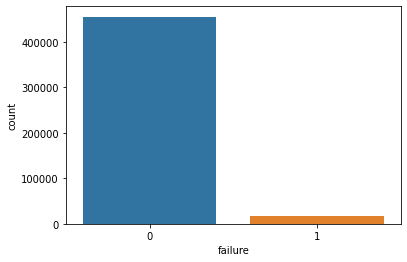

In [29]:
# delete
sns.countplot(df_train['failure'])

In [30]:
# Up-sampling the minority class for train data 
valid_train = df_train[df_train['failure'] == 0]    #data of HDDs which do not indicate failure
failed_train = df_train[df_train['failure'] == 1]   #data of HDDs likely to fail

In [31]:
print("valid hdds:",len(valid_train))      #storing the total number of valid HDDs
print("failing hdds:",len(failed_train))

valid hdds: 455762
failing hdds: 17024


In [32]:
# up-sample # as same length of valid 
failed_up = resample(failed_train,replace=True,n_samples=len(valid_train),random_state=27)  


In [33]:
# resample with train data
df_train = pd.concat([valid_train,failed_up])

In [34]:
#features selection
features = ['serial_number',
'model',
'failure',
'smart_1_normalized',
'smart_2_normalized',
'smart_2_raw',
'smart_3_normalized',
'smart_3_raw',
'smart_4_normalized',
'smart_4_raw',
'smart_5_normalized',
'smart_7_normalized',
'smart_8_raw',
'smart_9_normalized',
'smart_10_normalized',
'smart_11_normalized',
'smart_12_normalized',
'smart_13_normalized',
'smart_16_normalized',
'smart_17_normalized',
'smart_18_normalized',
'smart_22_normalized',
'smart_22_raw',
'smart_23_normalized',
'smart_24_normalized',
'smart_160_normalized',
'smart_160_raw',
'smart_161_normalized',
'smart_161_raw',
'smart_163_normalized',
'smart_163_raw',
'smart_164_normalized',
'smart_165_normalized',
'smart_165_raw',
'smart_166_normalized',
'smart_167_normalized',
'smart_168_normalized',
'smart_168_raw',
'smart_169_normalized',
'smart_170_normalized',
'smart_173_normalized',
'smart_174_normalized',
'smart_174_raw',
'smart_175_normalized',
'smart_176_normalized',
'smart_177_raw',
'smart_178_normalized',
'smart_178_raw',
'smart_179_normalized',
'smart_181_normalized',
'smart_182_normalized',
'smart_183_normalized',
'smart_183_raw',
'smart_184_normalized',
'smart_184_raw',
'smart_187_normalized',
'smart_187_raw',
'smart_188_normalized',
'smart_189_normalized',
'smart_189_raw',
'smart_191_normalized',
'smart_191_raw',
'smart_192_normalized',
'smart_193_normalized',
'smart_194_normalized',
'smart_194_raw',
'smart_195_normalized',
'smart_196_raw',
'smart_197_normalized',
'smart_198_normalized',
'smart_199_normalized',
'smart_199_raw',
'smart_200_normalized',
'smart_200_raw',
'smart_202_normalized',
'smart_210_normalized',
'smart_218_raw',
'smart_220_normalized',
'smart_220_raw',
'smart_222_raw',
'smart_223_normalized',
'smart_223_raw',
'smart_224_normalized',
'smart_225_normalized',
'smart_226_normalized',
'smart_231_normalized',
'smart_231_raw',
'smart_232_normalized',
'smart_233_normalized',
'smart_235_normalized',
'smart_240_normalized',
'smart_241_normalized',
'smart_242_normalized',
'smart_245_normalized',
'smart_247_normalized',
'smart_250_raw',
'smart_252_normalized',
'normalized_capacity_bytes',
'normalized_smart_1_raw',
'normalized_smart_241_raw',
'normalized_smart_242_raw',
'normalized_smart_7_raw',
'normalized_smart_9_raw',
'normalized_smart_11_raw',
'normalized_smart_173_raw',
'normalized_smart_188_raw',
'normalized_smart_193_raw',
'normalized_smart_195_raw',
'normalized_smart_225_raw',
'normalized_smart_232_raw',
'normalized_smart_233_raw',
'normalized_smart_235_raw',
'normalized_smart_240_raw',
'normalized_smart_247_raw',
'normalized_smart_251_raw',
'normalized_smart_252_raw',
'normalized_smart_5_raw',
'normalized_smart_197_raw',
'normalized_smart_10_raw',
'normalized_smart_198_raw'
]

In [35]:
# drop the remaining features
misc_feat = [fname for fname in df_train if fname not in features]  #misc features to be dropped 

In [36]:
# drop the remaining features
df_train.drop(misc_feat,inplace=True,axis=1)

In [37]:
# model cannot process string values, we remove the columns # to avoid errors 
obj = df_train.dtypes[df_train.dtypes == object ].index  

In [38]:
# drop the sting data 
df_train = df_train.drop(obj,axis=1)

In [39]:
df_train['failure'].value_counts()

1    455762
0    455762
Name: failure, dtype: int64

In [40]:
#Splitting the values for X_train and Y_train
X_train = df_train.drop('failure',axis=1)
Y_train = df_train['failure']

In [41]:
#Test data # do the all the step above in to Test data
valid_test = df_test[df_test['failure'] == 0]
failed_test = df_test[df_test['failure'] == 1]

In [42]:
# upsampling in test data
failed_up_test = resample(failed_test,replace=True,n_samples=len(valid_test),random_state=27)

In [43]:
# concat upsampling with test data
df_test = pd.concat([valid_test,failed_up_test])
df_test.failure.value_counts()

1    130039
0    130039
Name: failure, dtype: int64

In [44]:
# get only serial number form test data
#df_test_serial_number=df_test.serial_number
#df_test_failure=df_test.failure

In [45]:
# Feature selection in test data drop missing data in test data 
df_test.drop(misc_feat,inplace=True,axis=1)

In [46]:
# drop the string in test data
df_test = df_test.drop(obj,axis=1)

In [47]:
#Splitting values for X_test and Y_test
X_test = df_test.drop('failure',axis=1)
Y_test = df_test['failure']

In [48]:
# test data count
df_test['failure'].value_counts()

1    130039
0    130039
Name: failure, dtype: int64

In [49]:
# test data count
df_train['failure'].value_counts()

1    455762
0    455762
Name: failure, dtype: int64

In [50]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

#  model creation 
rfc = RandomForestClassifier() 
rfc.fit(X_train, Y_train) 

#X_test = X_test.drop('serial_number',axis=1)
# Predictions 


RandomForestClassifier()

In [51]:
yPred = rfc.predict(X_test) 

In [52]:
yPred_df = pd.DataFrame(yPred, columns = ['Model_Prediction'])


In [53]:
#Results of our predictions

#n_outliers = len(failed) 
n_errors = (yPred != Y_test).sum() 

In [54]:
print("Model used is: Random Forest classifier") 
  
acc = accuracy_score(Y_test, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(Y_test, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, yPred) 
print("The recall is {}".format(rec))
f1 = f1_score(Y_test, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(Y_test, yPred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

Model used is: Random Forest classifier
The accuracy is 0.9990272149124494
The precision is 0.9986552529661278
The recall is 0.9994001799460162
The F1-Score is 0.9990275775920054
The Matthews correlation coefficient is 0.9980547074895781


In [48]:
#Model is saved 
import pickle

model_filename = "My_rfc_model.sav"

saved_model = pickle.dump(rfc, open(model_filename,'wb'))
 
print('Model is saved into to disk successfully Using Pickle')

Model is saved into to disk successfully Using Pickle


In [60]:
# run the saved #Model is saved 
import pickle
# events1.disk_smartdata_dtls
model_filename = "My_rfc_model.sav"

my_knn_model = pickle.load(open(model_filename, 'rb'))

result = my_knn_model.predict(X_validation2)

result
result = pd.DataFrame(result, columns =['Prediction'])
#e_dataframe = pd.DataFrame(e) 
#Probability_of_failure = pd.DataFrame(y_pred_prob)
result

,Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [51]:
# MODEL VALIDATION STEP Start
df_validation = df_validate 

In [52]:
#validation data # do the all the step above in to validation data
valid_validation = df_validation[df_validation['failure'] == 0]
failed_validation = df_validation[df_validation['failure'] == 1]

print("valid hdds:",len(valid_validation))
print("failing hdds:",len(failed_validation))

valid hdds: 65138
failing hdds: 2402


In [53]:
# up-sampling in validation data
# get only serial number form validation data
df_validation_serial_number=df_validation.serial_number
df_validation_failure=df_validation.failure

# get only serial number 
df_validation_serial_number = df_validation_serial_number.to_frame()



In [54]:
# validation2
validation2_serial_number=validation2.serial_number
validation2_failure=validation2.failure
validation2_serial_number = validation2_serial_number.to_frame()



In [55]:
# validation2
validation2.drop(misc_feat,inplace=True,axis=1)


/home/smicro/.local/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
# validation2
validation2 = validation2.drop(obj,axis=1)

In [57]:
# validation2
X_validation2 = validation2.drop('failure',axis=1)
Y_validation2 = validation2['failure']

In [58]:
X_validation2 = X_validation2.drop('serial_number',axis=1)

KeyError: "['serial_number'] not found in axis"

In [220]:
# validation2
yPred_validation2 = rfc.predict(X_validation2) 
yPred_df_yPred_validation2 = pd.DataFrame(yPred_validation2, columns = ['Model_Prediction'])


In [221]:
# Feature selection in validation data drop missing data in validation data 
df_validation.drop(misc_feat,inplace=True,axis=1)

# drop the string in validation data 
df_validation = df_validation.drop(obj,axis=1)

#Splitting values for X_validation and Y_validation
X_validation = df_validation.drop('failure',axis=1)
Y_validation = df_validation['failure']


/home/smicro/.local/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [222]:
# validation2 
validation2_serial_number['row_num'] = np.arange(len(validation2_serial_number))
yPred_df_yPred_validation2['row_num'] = np.arange(len(yPred_df_yPred_validation2))
result = pd.concat([validation2_serial_number, yPred_df_yPred_validation2], axis=1)
# Stack the Data Frames on top of each other
yPred_df_yPred_validation2.Model_Prediction.replace((0, 1), ('not_fail', 'Predicted_to_be_fail'), inplace=True)
RandomForest_Model_Prediction=validation2_serial_number.merge(yPred_df_yPred_validation2, on='row_num', how='left')
RandomForest_Model_Prediction = RandomForest_Model_Prediction.drop(['row_num'], 1)
RandomForest_Model_Prediction

,serial_number,Model_Prediction
0,CVPR223400LU040AGN,not_fail
1,3511K05DFTMB,not_fail
2,WD-WCC5ZEZ5NDRN,not_fail
3,Z1Y45DJ1,not_fail
4,WD-WCC5Z0010781,not_fail
5,WD-WCC5Z0012901,not_fail
6,WD-WCC5ZLX9VCEY,not_fail
7,MK0351YHG5EBTA,not_fail
8,Z1Y44NLQ,not_fail
9,Z1Y44P79,not_fail


In [226]:
#3 DELETE
import numpy as np
import pandas as pd
y_pred_prob = rfc.predict_proba(X_validation2)
Probability_of_failure = pd.DataFrame(y_pred_prob, columns =['Active_Probability','Failure_Probability'])
#e_dataframe = pd.DataFrame(e) 
#Probability_of_failure = pd.DataFrame(y_pred_prob)
Probability_of_failure
#3
result = pd.concat([validation2_serial_number, yPred_df_yPred_validation2, Probability_of_failure], axis=1)
result.Model_Prediction.replace((0, 1), ('not_fail', 'Predicted_to_be_fail'), inplace=True)
result

/home/smicro/.local/lib/python3.6/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,serial_number,row_num,Model_Prediction,row_num,Active_Probability,Failure_Probability
0,CVPR223400LU040AGN,0,not_fail,0,1.0,0.0
1,3511K05DFTMB,1,not_fail,1,1.0,0.0
2,WD-WCC5ZEZ5NDRN,2,not_fail,2,1.0,0.0
3,Z1Y45DJ1,3,not_fail,3,1.0,0.0
4,WD-WCC5Z0010781,4,not_fail,4,1.0,0.0
5,WD-WCC5Z0012901,5,not_fail,5,1.0,0.0
6,WD-WCC5ZLX9VCEY,6,not_fail,6,1.0,0.0
7,MK0351YHG5EBTA,7,not_fail,7,1.0,0.0
8,Z1Y44NLQ,8,not_fail,8,1.0,0.0
9,Z1Y44P79,9,not_fail,9,1.0,0.0


In [225]:
dataset.dtypes

serial_number                object
model                          int8
failure                       int64
smart_1_normalized          float64
smart_2_normalized          float64
                             ...   
normalized_smart_252_raw    float64
normalized_smart_5_raw      float64
normalized_smart_197_raw    float64
normalized_smart_10_raw     float64
normalized_smart_198_raw    float64
Length: 125, dtype: object

In [106]:
#X_validation 
X_validation = X_validation.drop('serial_number',axis=1)

KeyError: "['serial_number'] not found in axis"

In [107]:
# for normal validation data
yPred = rfc.predict(X_validation) 
yPred_df = pd.DataFrame(yPred, columns = ['Model_Prediction'])


In [108]:
# assign the row_num before merge
df_validation_serial_number['row_num'] = np.arange(len(df_validation_serial_number))
yPred_df['row_num'] = np.arange(len(yPred_df))
result = pd.concat([df_validation_serial_number, yPred_df], axis=1)


In [109]:
# Stack the Data Frames on top of each other
yPred_df.Model_Prediction.replace((0, 1), ('not_fail', 'Predicted_to_be_fail'), inplace=True)
RandomForest_Model_Prediction=df_validation_serial_number.merge(yPred_df, on='row_num', how='left')
RandomForest_Model_Prediction = RandomForest_Model_Prediction.drop(['row_num'], 1)
RandomForest_Model_Prediction


,serial_number,Model_Prediction
0,5YD0WS6G,not_fail
1,MK0271YGJP8LVA,not_fail
2,S1Z24EDQ,not_fail
3,MK0371YHKBGUVA,not_fail
4,Z1Y45RA5,not_fail
...,...,...
67535,6YD1L69W,not_fail
67536,MK0171YFJMN9AA,not_fail
67537,Z1Y45DJ1,not_fail
67538,MK0371YHJXMD1A,not_fail


In [110]:
df_validation['failure'].value_counts()

0    65087
1     2453
Name: failure, dtype: int64

In [111]:
RandomForest_Model_Prediction['Model_Prediction'].value_counts()

not_fail                64990
Predicted_to_be_fail     2550
Name: Model_Prediction, dtype: int64

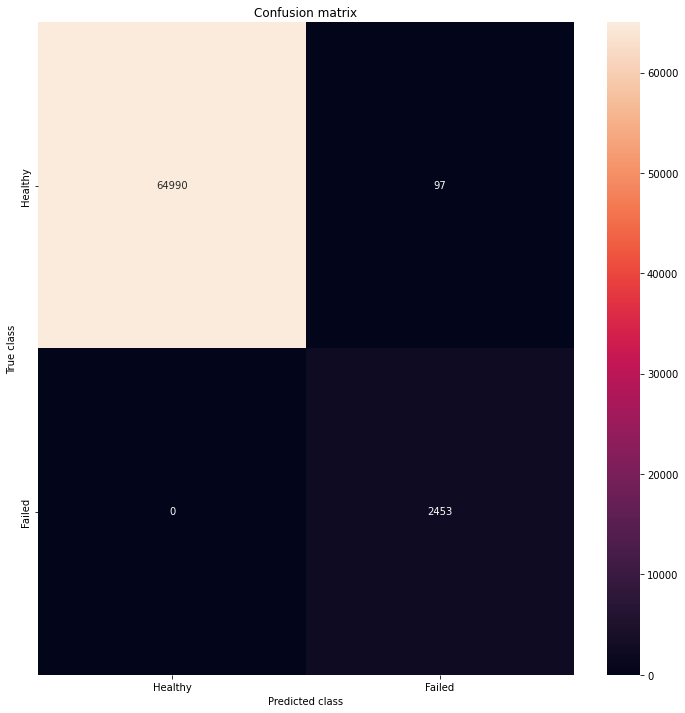

In [112]:
# this step is not required for validation data
#Splitting values for X_test and Y_test
X_test_val = df_validation.drop('failure',axis=1)
Y_test_val = df_validation['failure']
#confusion matrix test data
LABELS = ['Healthy', 'Failed'] 
conf_matrix = confusion_matrix(Y_test_val, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [118]:
# print output of the model
RandomForest_Model_Prediction.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\RandomForest_Model_Prediction.csv')

In [114]:
#HTML
html = RandomForest_Model_Prediction.to_html()
# write html to file
text_file = open("RandomForest_Model_Prediction.html", "w")
text_file.write(html)
text_file.close()

In [75]:
######### end

In [115]:
### lets try GLM model
from sklearn.linear_model import LogisticRegression

glm_model = LogisticRegression()
#  model creation 
glm_model = LogisticRegression() 
glm_model.fit(X_train, Y_train) 

# predictions(Notice the caps'P' of yPred to differentiate between model 1 and 2) 
yPred = glm_model.predict(X_test) 

yPred_df = pd.DataFrame(yPred, columns = ['Model_Prediction'])

#Results of our predictions

  
#n_outliers = len(failed) 
n_errors = (yPred != Y_test).sum() 

print("Model used is: LogisticRegression") 
  
acc = accuracy_score(Y_test, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(Y_test, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, yPred) 
print("The recall is {}".format(rec))
f1 = f1_score(Y_test, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(Y_test, yPred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 
# YOU NEED TO FOLLOW THE VALIDATION STEP 

/home/smicro/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model used is: LogisticRegression
The accuracy is 0.9820355600633135
The precision is 0.9980549380755795
The recall is 0.9659536213175972
The F1-Score is 0.9817419349800472
The Matthews correlation coefficient is 0.964570180398821


In [116]:
### lets try XGB model 3rd model

XGB_model = XGBClassifier()
#  model creation 
XGB_model = XGBClassifier() 
XGB_model.fit(X_train, Y_train) 

# predictions(Notice the caps'P' of yPred to differentiate between model 1 and 2) 
yPred = XGB_model.predict(X_test) 
yPred_df = pd.DataFrame(yPred, columns = ['Model_Prediction'])

#Results of our predictions

  
#n_outliers = len(failed) 
n_errors = (yPred != Y_test).sum() 

print("Model used is: XGBClassifier") 
  
acc = accuracy_score(Y_test, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(Y_test, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, yPred) 
print("The recall is {}".format(rec))
f1 = f1_score(Y_test, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(Y_test, yPred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 
# YOU NEED TO FOLLOW THE VALIDATION STEP 

/home/smicro/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model used is: XGBClassifier
The accuracy is 0.999404514929387
The precision is 0.9989942650073319
The recall is 0.9998155917200683
The F1-Score is 0.9994047596188926
The Matthews correlation coefficient is 0.9988093674246907


In [117]:
# 4th model KNeighborsClassifier
KNeighborsClassifier_model = KNeighborsClassifier()
#  model creation 
KNeighborsClassifier_model = KNeighborsClassifier() 
KNeighborsClassifier_model.fit(X_train, Y_train) 

# predictions(Notice the caps'P' of yPred to differentiate between model 1 and 2) 
yPred = KNeighborsClassifier_model.predict(X_test) 

yPred_df = pd.DataFrame(yPred, columns = ['Model_Prediction'])

#Results of our predictions
  
#n_outliers = len(failed) 
n_errors = (yPred != Y_test).sum() 

print("Model used is: KNeighborsClassifier") 
  
acc = accuracy_score(Y_test, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(Y_test, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, yPred) 
print("The recall is {}".format(rec))
f1 = f1_score(Y_test, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(Y_test, yPred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 
# YOU NEED TO FOLLOW THE VALIDATION STEP 

KeyboardInterrupt: 

In [ ]:
# 5th model GaussianNB_model

GaussianNB_model = GaussianNB()
#  model creation 
GaussianNB_model = GaussianNB() 
GaussianNB_model.fit(X_train, Y_train) 
# predictions(Notice the caps'P' of yPred to differentiate between model 1 and 2) 
yPred = GaussianNB_model.predict(X_test) 
yPred_df = pd.DataFrame(yPred, columns = ['Model_Prediction'])
#Results of our predictions
#n_outliers = len(failed) 
n_errors = (yPred != Y_test).sum() 
print("Model used is: GaussianNB") 
acc = accuracy_score(Y_test, yPred) 
print("The accuracy is {}".format(acc)) 
prec = precision_score(Y_test, yPred) 
print("The precision is {}".format(prec)) 
rec = recall_score(Y_test, yPred) 
print("The recall is {}".format(rec))
f1 = f1_score(Y_test, yPred) 
print("The F1-Score is {}".format(f1)) 
MCC = matthews_corrcoef(Y_test, yPred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 
# YOU NEED TO FOLLOW THE VALIDATION STEP 

In [ ]:
# 6th model svm model
#Import svm model 
svm_model = SVC(gamma='auto')
svm_model.fit(X_train, Y_train) 

In [ ]:
# predictions(Notice the caps'P' of yPred to differentiate between model 1 and 2) 
yPred = svm_model.predict(X_test) 
yPred_df = pd.DataFrame(yPred, columns = ['Model_Prediction'])
#Results of our predictions
#n_outliers = len(failed) 
n_errors = (yPred != Y_test).sum() 
print("Model used is: svm") 
acc = accuracy_score(Y_test, yPred) 
print("The accuracy is {}".format(acc)) 
prec = precision_score(Y_test, yPred) 
print("The precision is {}".format(prec)) 
rec = recall_score(Y_test, yPred) 
print("The recall is {}".format(rec))
f1 = f1_score(Y_test, yPred) 
print("The F1-Score is {}".format(f1)) 
MCC = matthews_corrcoef(Y_test, yPred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 
# YOU NEED TO FOLLOW THE VALIDATION STEP 


In [1]:
# Modeling approach 1 run the model in live database and run with test data - take 3 min time to load all the data
# Modeling approach 2 save the model and run with test data - it does not take time 

# save the model to disk
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))
# some time later...######### preprocess test data alone to test the prediction results
# load the model from disk

# read testdata #########################################################################
# read testdata, #Missing value Imputation, # Remove CORRILATION VARIYABLE 
# drop date # remove top 10 missing variables # Remove below variable as it has only one value # normalize the data 
# drop after normalization # Label Encoding model
# data conversion  # define the y variable #QuantileTransformer 
# remove max VIF variables #features selection #misc_feat - drop the remaining features 
# drop the sting data #Splitting the values for X_train and Y_train 
# get only serial number form test data # pass x test to get the prediction

import pickle
loaded_model = pickle.load(open(filename, 'rb'))
# accuraccy score with test data
accuraccy_result = loaded_model.score(X_test, Y_test)
print(result)
# final prediction results 
prediction_result=loaded_model.predict(X_test)
prediction_result
#Model_Prediction dataframe
Model_Prediction = pd.DataFrame(prediction_result, columns =['Model_Prediction'])
print("\nPandas DataFrame: ")
Model_Prediction
df_test_serial_number=pd.DataFrame(df_test_serial_number)
Model_Prediction['row_num'] = np.arange(len(Model_Prediction))
df_test_serial_number['row_num'] = np.arange(len(df_test_serial_number))
#result = pd.concat([Model_Prediction, df_test_serial_number], axis=1)
# Stack the Data Frames on top of each other
Model_Prediction.Model_Prediction.replace((0, 1), ('not_fail', 'Predicted_to_be_fail'), inplace=True)
RandomForest_Model_Prediction=df_test_serial_number.merge(Model_Prediction, on='row_num', how='left')
RandomForest_Model_Prediction = RandomForest_Model_Prediction.drop(['row_num'], 1)
RandomForest_Model_Prediction

NameError: name 'rfc' is not defined

In [58]:
y_train=Y_train

In [60]:
y_test=Y_test

In [93]:
dataset2=dataset
data=dataset

In [119]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [152]:

from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifi
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
#from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import numpy as np
from sklearn.model_selection import ParameterGrid
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
# Data manipulation
import pandas as pd
import numpy as np
#from sklearn.grid_search import RandomizedSearchCV
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import train_test_split
# Modeling
#import lightgbm as lgb

# Splitting data
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [153]:
####################### https://stackoverflow.com/questions/51397611/randomforestclassifier-instance-not-fitted-yet-call-fit-with-appropriate-argu
label=data.failure
serial_number=data.serial_number
data = data.drop('serial_number',axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.20, random_state=4)


AttributeError: 'DataFrame' object has no attribute 'serial_number'

In [154]:

names = ["Decision Tree", "Random Forest", "Neural Net"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier()
    ]

score = 0
for name, clf in zip(names, classifiers):
    if name == "Decision Tree":
        clf = DecisionTreeClassifier(random_state=0)
        grid_search = GridSearchCV(clf, param_grid=param_grid_DT)
        grid_search.fit(X_train, y_train_TF)
        if grid_search.best_score_ > score:
            score = grid_search.best_score_
            best_clf = clf
    elif name == "Random Forest":
        clf = RandomForestClassifier(random_state=0)
        grid_search = GridSearchCV(clf, param_grid_RF)
        grid_search.fit(X_train, y_train_TF)
        if grid_search.best_score_ > score:
            score = grid_search.best_score_
            best_clf = clf

    elif name == "Neural Net":
        clf = MLPClassifier()
        clf.fit(X_train, y_train_TF)
        y_pred = clf.predict(X_test)
        current_score = accuracy_score(y_test_TF, y_pred)
        if current_score > score:
            score = current_score
            best_clf = clf


pkl_filename = "pickle_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(best_clf, file)

from sklearn.externals import joblib
# Save to file in the current working directory
joblib_file = "joblib_model.pkl"  
joblib.dump(best_clf, joblib_file)

print("best classifier: ", best_clf, " Accuracy= ", score)

NameError: name 'param_grid_DT' is not defined

In [143]:
import sklearn
print(sklearn.__version__)

0.24.2
